In [1]:
import numpy as np
import pandas as pd
A_a_1=pd.read_csv("[Nut2NHI] data_hw_ver4.csv")
A_a_1_cols=A_a_1.columns

A_a_1_cols_new=['sex','age','ID','year']


for x in A_a_1_cols:
    if x.startswith("HE"):
        A_a_1_cols_new.append(x)
       
A_a_1=A_a_1[A_a_1_cols_new]

test=pd.read_excel("검진데이터 정리본_유니스트_송부.xlsx")

test=test.drop(['성명','환자번호','r-GTP','알부민','BUN'],axis=1)

test['생년월일']=test['생년월일'].apply(lambda x: int(str(x)[0:2])+1900)
test['age']=test['생년월일'].apply(lambda x: 2019-x+1)
test=test.drop(['검진일','생년월일'],axis=1)

test.columns=['sex','HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro','age']
A_a_1=A_a_1[['sex','HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro','age']]

In [2]:
A_a_1=A_a_1[(A_a_1['HE_ht'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_wt'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_wc'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_BMI'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_sbp'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_dbp'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_Upro'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_HbA1c'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_glu'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_chol'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_TG'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_HDL_st2'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_LDL_drct'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_crea'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_ast'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_alt'].notnull())]

A_a_1=A_a_1[A_a_1['age']>=20]


test=test[(test['HE_ht'].notnull())]
test=test[(test['HE_wt'].notnull())]
test=test[(test['HE_wc'].notnull())]
test=test[(test['HE_BMI'].notnull())]
test=test[(test['HE_sbp'].notnull())]
test=test[(test['HE_dbp'].notnull())]
test=test[(test['HE_Upro'].notnull())]
test=test[(test['HE_HbA1c'].notnull())]
test=test[(test['HE_glu'].notnull())]
test=test[(test['HE_chol'].notnull())]
test=test[(test['HE_TG'].notnull())]
test=test[(test['HE_HDL_st2'].notnull())]
test=test[(test['HE_LDL_drct'].notnull())]
test=test[(test['HE_crea'].notnull())]
test=test[(test['HE_ast'].notnull())]
test=test[(test['HE_alt'].notnull())]

# test=test[test['age']>=20]

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 534
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          491 non-null    object 
 1   HE_ht        491 non-null    float64
 2   HE_wt        491 non-null    float64
 3   HE_BMI       491 non-null    float64
 4   HE_sbp       491 non-null    float64
 5   HE_dbp       491 non-null    float64
 6   HE_wc        491 non-null    float64
 7   HE_HbA1c     491 non-null    float64
 8   HE_ast       491 non-null    int64  
 9   HE_alt       491 non-null    int64  
 10  HE_chol      491 non-null    int64  
 11  HE_HDL_st2   491 non-null    float64
 12  HE_LDL_drct  491 non-null    float64
 13  HE_TG        491 non-null    int64  
 14  HE_glu       491 non-null    int64  
 15  HE_crea      491 non-null    float64
 16  HE_Upro      491 non-null    float64
 17  age          491 non-null    int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 

In [3]:
import lightgbm 
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


dataset_total=A_a_1
dataset_men=A_a_1[A_a_1['sex']==1]
dataset_women=A_a_1[A_a_1['sex']==2]



target_total=dataset_total["age"]
features_total=dataset_total.drop(["age"],axis=1)

target_men=dataset_men["age"]
features_men=dataset_men.drop(["sex","age"],axis=1)

target_women=dataset_women["age"]
features_women=dataset_women.drop(["sex","age"],axis=1)



In [4]:
test_men=test[(test['sex']=='남')|(test['sex']=='남자')]
test_women=test[(test['sex']=='여')|(test['sex']=='여자')]

test_men_target=test_men['age']
test_men_features=test_men.drop(['sex','age'],axis=1)

test_women_target=test_women['age']
test_women_features=test_women.drop(['sex','age'],axis=1)



[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.056406
[LightGBM] [Debug] init for col-wise cost 0.000022 seconds, init for row-wise cost 0.001641 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 3805, number of used features: 16
[LightGBM] [Info] Start training from score 50.137714
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Warning] No further splits w

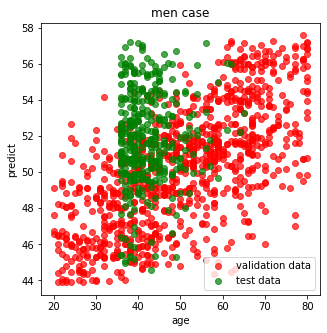

In [11]:
plt.rcParams["figure.figsize"] = (5, 5)

from sklearn.preprocessing import MinMaxScaler

men_x_train, men_x_test, men_y_train, men_y_test= train_test_split(features_men,target_men,test_size=0.2,random_state=200)

lgb_reg_2 = LGBMRegressor(verbosity=50,learning_rate=0.005,boosting='gbdt',metric='regression_l2',max_depth=5,num_leaves=32,n_estimators=200) 

sc=MinMaxScaler()

features_men_std=sc.fit_transform(features_men)
features_men=pd.DataFrame(features_men_std,columns=['HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro'])


# lgb_reg_2.fit(features_men, target_men)

men_x_train_std=sc.fit_transform(men_x_train)
men_x_train=pd.DataFrame(men_x_train_std,columns=['HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro'])


lgb_reg_2.fit(men_x_train, men_y_train)


men_x_test_std=sc.transform(men_x_test)
men_x_test=pd.DataFrame(men_x_test_std,columns=['HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro'])



test_men_features_std=sc.fit_transform(test_men_features)
test_men_features=pd.DataFrame(test_men_features_std,columns=['HE_ht','HE_wt','HE_BMI','HE_sbp','HE_dbp','HE_wc','HE_HbA1c','HE_ast','HE_alt','HE_chol','HE_HDL_st2','HE_LDL_drct','HE_TG','HE_glu','HE_crea','HE_Upro'])


answer_1 = pd.DataFrame(men_y_test.reset_index()) #validation
del answer_1["index"]

answer_2 = pd.DataFrame(test_men_target.reset_index())#test
del answer_2["index"]


plt.title("men case")
plt.xlabel("age")
plt.ylabel("predict")
plt.scatter(answer_1,lgb_reg_2.predict(men_x_test),label='validation data',color='r',alpha=.7)
plt.scatter(answer_2,lgb_reg_2.predict(test_men_features),label='test data',color='g',alpha=.7)
plt.legend()
plt.show()

# plt.scatter(answer,lgb_reg_2.predict(test_men_features))


In [63]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


print("R2: {0},  variance_score: {1}".format(r2_score(answer_2,lgb_reg_2.predict(t. est_men_features)),explained_variance_score(answer_2,lgb_reg_2.predict(test_men_features),multioutput='uniform_average')))



R2: -5.017247763194972,  variance_score: -0.6170945142054294


Text(0.5, 0, 'LgihtGBM Feature of men Importance')

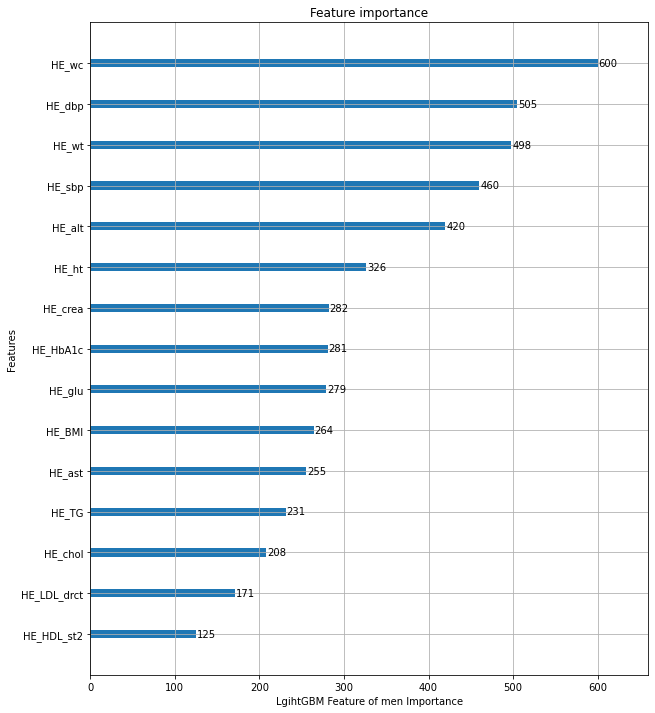

In [342]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_2, ax=ax)
plt.xlabel("LgihtGBM Feature of men Importance")

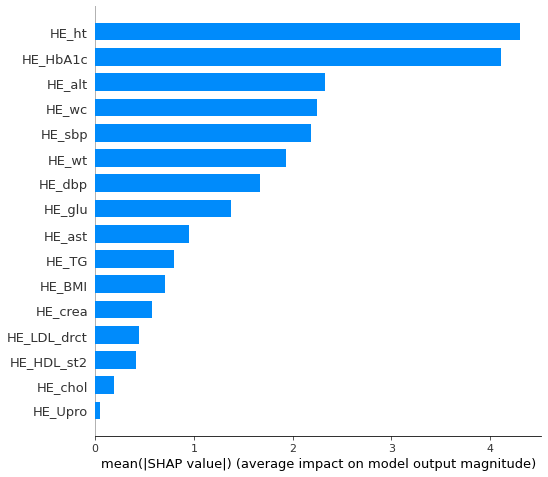

In [201]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_2).shap_values(test_men_features)
shap.summary_plot(shap_values, men_x_test, plot_type="bar")

In [238]:
test_men_features.loc[:,'age']=test_men_target



#test_men_features=test_men_features[(test_men_features['age']>=60)]

men_y_test=test_men_features.iloc[:,[16]]
men_x_test=test_men_features.drop(["age"],axis=1)


# men_x_test

In [239]:
#body age

men_x_train_body=features_men.loc[:,["HE_ht","HE_wt","HE_wc","HE_BMI"]]

men_x_test_body=test_men_features.loc[:,["HE_ht","HE_wt","HE_wc","HE_BMI"]]



[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.001412 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 4
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightG

Text(0, 0.5, 'predict')

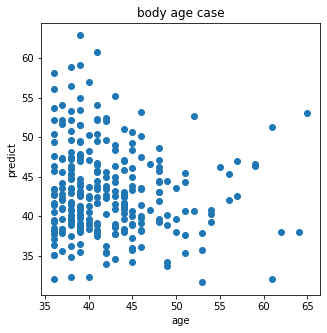

In [263]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_body = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=2,num_leaves=8,n_estimators=100) 
lgb_reg_body.fit(men_x_train_body, target_men)

answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_body.predict(men_x_test_body)) 
plt.title("body age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of body age Importance')

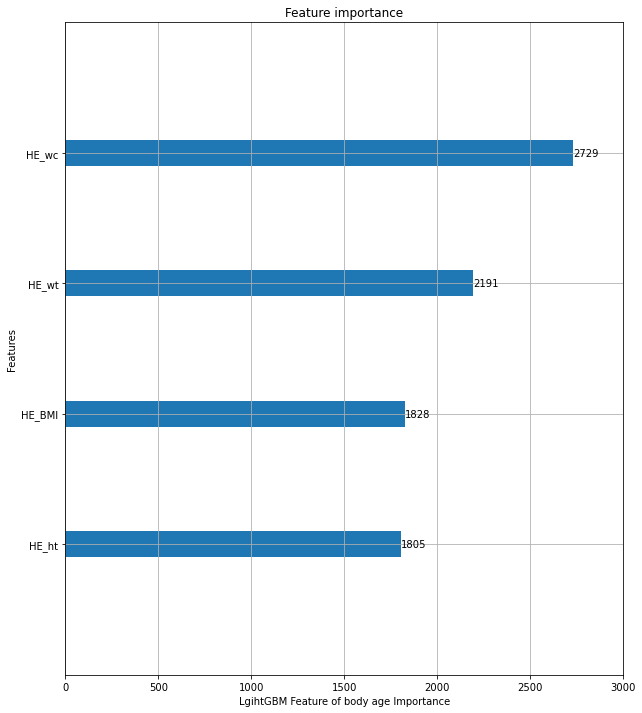

In [205]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_body, ax=ax)
plt.xlabel("LgihtGBM Feature of body age Importance")

In [264]:
#metabolism

# total_x_train

men_x_train_meta=features_men.loc[:,["HE_wc","HE_sbp","HE_dbp","HE_HDL_st2","HE_LDL_drct","HE_TG","HE_glu"]] 

men_x_test_meta=test_men_features.loc[:,["HE_wc","HE_sbp","HE_dbp","HE_HDL_st2","HE_LDL_drct","HE_TG","HE_glu"]]


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000010 seconds, init for row-wise cost 0.001699 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 7
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained

Text(0, 0.5, 'predict')

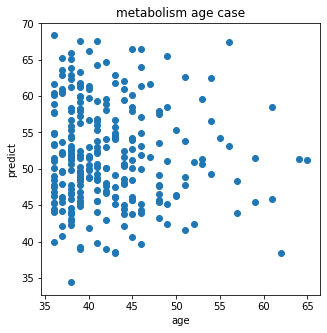

In [275]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_meta = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=4,num_leaves=8,n_estimators=100) 
lgb_reg_meta.fit(men_x_train_meta, target_men)



answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_meta.predict(men_x_test_meta)) 
plt.title("metabolism age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of metabolism age Importance')

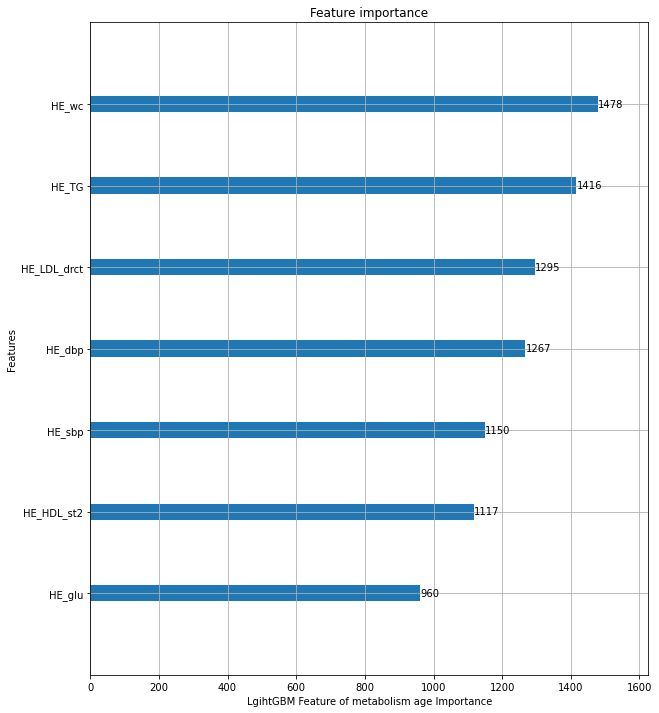

In [208]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_meta, ax=ax) #여기 수정
plt.xlabel("LgihtGBM Feature of metabolism age Importance")

In [276]:
# blood vessel age

men_x_train_blood=features_men.loc[:,["HE_wc","HE_sbp","HE_dbp","HE_HDL_st2","HE_LDL_drct","HE_TG","HE_glu"]] 

men_x_test_blood=test_men_features.loc[:,["HE_wc","HE_sbp","HE_dbp","HE_HDL_st2","HE_LDL_drct","HE_TG","HE_glu"]]

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000356 seconds, init for row-wise cost 0.002075 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 7
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 3
[LightG

Text(0, 0.5, 'predict')

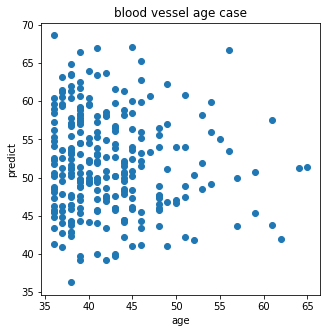

In [281]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_blood = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=5,num_leaves=5,n_estimators=100) 
lgb_reg_blood.fit(men_x_train_blood, target_men)



answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_blood.predict(men_x_test_blood)) 
plt.title("blood vessel age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of blood age Importance')

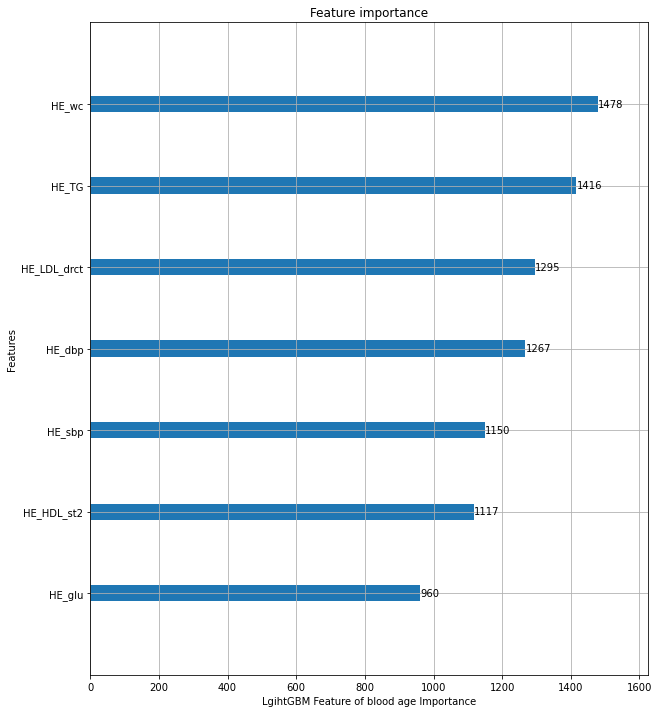

In [211]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(lgb_reg_blood, ax=ax) #여기수정
plt.xlabel("LgihtGBM Feature of blood age Importance")

In [282]:
# immunity age

men_x_train_immu=features_men.loc[:,["HE_HbA1c","HE_ast","HE_alt","HE_HDL_st2"]] 

men_x_test_immu=test_men_features.loc[:,["HE_HbA1c","HE_ast","HE_alt","HE_HDL_st2"]]

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000263
[LightGBM] [Debug] init for col-wise cost 0.000010 seconds, init for row-wise cost 0.000969 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 4
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 32 and depth = 5
[LightGBM] [Debug] Traine

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 17 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 18 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 25 and depth = 5
[LightGBM] [Warning]

Text(0, 0.5, 'predict')

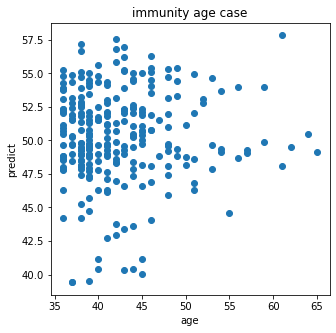

In [286]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_immu = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=5,num_leaves=64,n_estimators=100) 
lgb_reg_immu.fit(men_x_train_immu, target_men)



answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_immu.predict(men_x_test_immu)) 
plt.title("immunity age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of immunity age Importance')

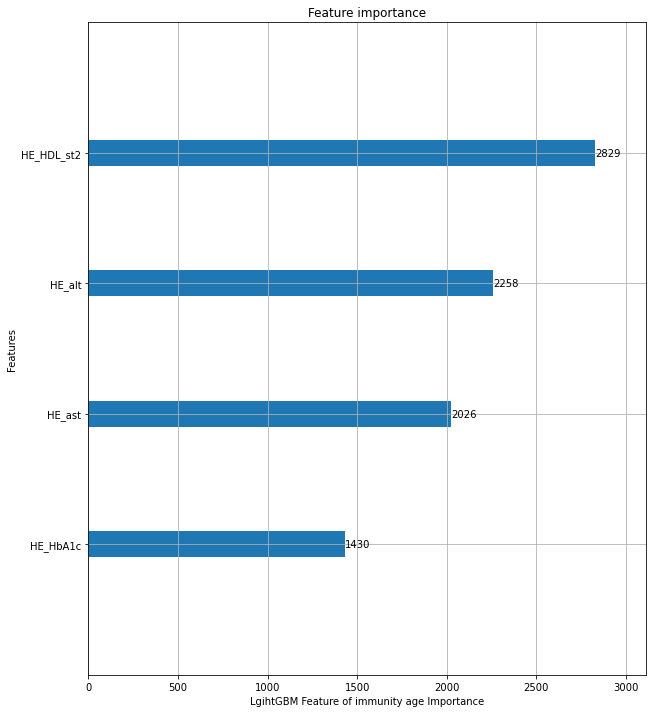

In [214]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_immu, ax=ax) #여기 수정
plt.xlabel("LgihtGBM Feature of immunity age Importance")

In [288]:
#lung age

men_x_train_lung=features_men.loc[:,["HE_sbp","HE_dbp"]]
men_x_test_lung=test_men_features.loc[:,["HE_sbp","HE_dbp"]]

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000008 seconds, init for row-wise cost 0.000768 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 2
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGB

Text(0, 0.5, 'predict')

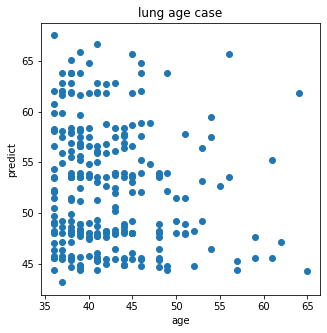

In [313]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_lung = LGBMRegressor(verbosity=50,learning_rate=0.03,boosting='gbdt',metric='regression_l2',max_depth=3,num_leaves=256,n_estimators=100) 
lgb_reg_lung.fit(men_x_train_lung, target_men)


answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_lung.predict(men_x_test_lung))
plt.title("lung age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of immunity age Importance')

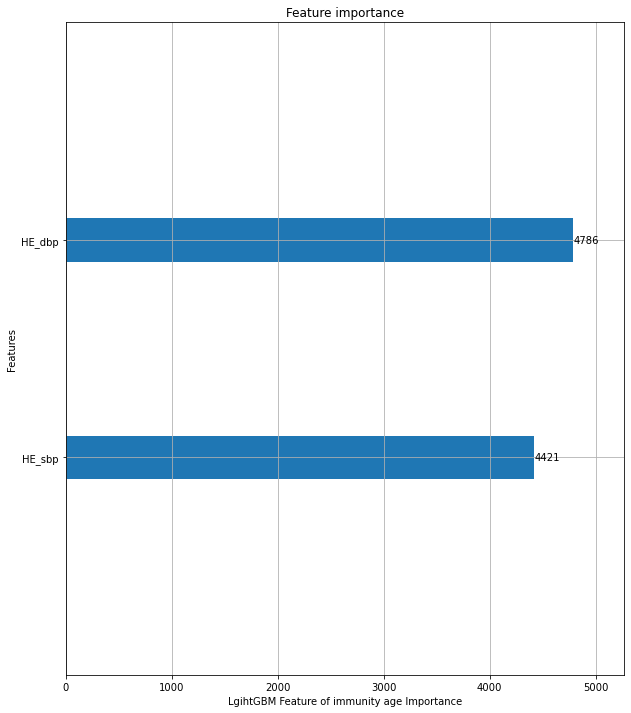

In [217]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_lung, ax=ax)
plt.xlabel("LgihtGBM Feature of immunity age Importance")

In [314]:
#kidney age

men_x_train_kid=features_men.loc[:,["HE_crea"]]
men_x_test_kid=test_men_features.loc[:,["HE_crea"]]

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.000598 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 1
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 37 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3

[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] T

Text(0, 0.5, 'predict')

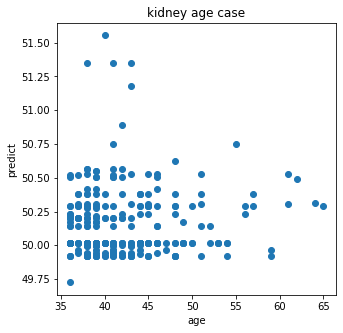

In [322]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_kid = LGBMRegressor(verbosity=50,learning_rate=0.001,boosting='gbdt',metric='regression_l2',max_depth=7,num_leaves=256,n_estimators=100) 
lgb_reg_kid.fit(men_x_train_kid, target_men)


answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_kid.predict(men_x_test_kid))
plt.title("kidney age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of kidney age Importance')

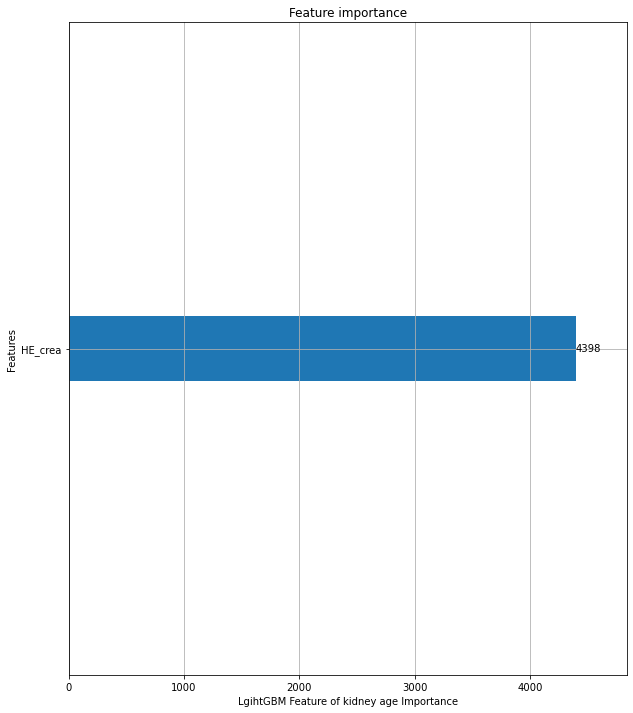

In [220]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_kid, ax=ax)
plt.xlabel("LgihtGBM Feature of kidney age Importance")

In [323]:
#joint age

men_x_train_jo=features_men.loc[:,["HE_ht","HE_wt","HE_BMI"]]
men_x_test_jo=test_men_features.loc[:,["HE_ht","HE_wt","HE_BMI"]]

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000210
[LightGBM] [Debug] init for col-wise cost 0.000008 seconds, init for row-wise cost 0.000937 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 4757, number of used features: 3
[LightGBM] [Info] Start training from score 50.174900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and depth = 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 2

Text(0, 0.5, 'predict')

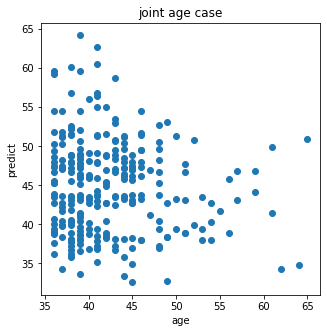

In [333]:
plt.rcParams["figure.figsize"] = (5, 5)

lgb_reg_jo = LGBMRegressor(verbosity=50,learning_rate=0.04,boosting='gbdt',metric='regression_l2',max_depth=5,num_leaves=64,n_estimators=100) 
lgb_reg_jo.fit(men_x_train_jo, target_men)


answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_jo.predict(men_x_test_jo))
plt.title("joint age case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of joint age Importance')

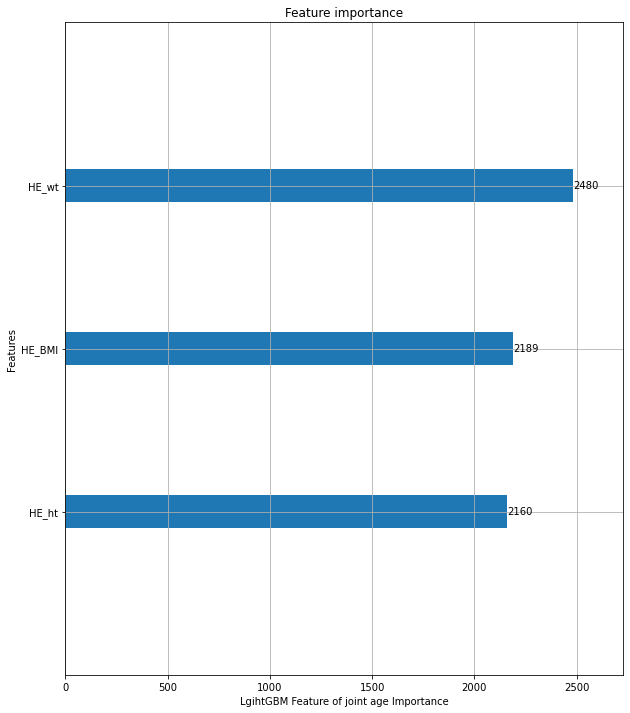

In [223]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_jo, ax=ax)
plt.xlabel("LgihtGBM Feature of joint age Importance")